# Predykcja ocen studentów 

#### Dane pochodzą z dwóch portugalskich szkół średnich. Zawierają one szczegółowe dane na temat uczniów wraz z ocenami końcowymi za każdy rok nauki z matematyki oraz języka portugalskiego.
#### Dane zawierają 33 zmienne:

- school      -	szkoła, do której uczęszcza uczeń   (binara: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira) <br>
- sex	        -   płeć ucznia (binarna: 'F' - kobieta, 'M' - mężczyzna)<br>
- age         -	wiek ucznia (liczbowa: od 15 do 22)<br>
- address     -	typ miejsca zamieszkania studenta (binarna: 'U' - miejski, 'R' - wiejski)<br>
- famsize     -   liczebność rodziny (binarna: 'LE3' - mniej lub 3, 'GT3' - więcej niż 3)<br>
- Pstatus     -	status rodziców (binarna: 'T' - mieszkają razem, 'A' - mieszkają rozdzielnie)<br>
- Medu        -	wykształcenie matki (liczbowa: 0 - brak, 1 - edukacja podstawowa (4. klasa), 2 - 5. do 9. klasy, 3 - wykształcenie średnie, 4 - wykształcenie wyższe)<br>
- Fedu        -	wykształcenie ojca (liczbowa: 0 - brak, 1 - edukacja podstawowa (4. klasa), 2 - 5. do 9. klasy, 3 - wykształcenie średnie, 4 - wykształcenie wyższe)<br>
- Mjob        -	zawód matki (kategoryczna: 'teacher' nauczycielka, 'health' służba zdrowia, usługi/służby 'services' (np. administracja, policja), 'at_home' w domu, 'other' inne)<br>
- Fjob        -	zawód ojca (kategoryczna: 'teacher' nauczyciel, 'health' służba zdrowia, usługi/służby 'services' (np. administracja, policja), 'at_home' w domu, 'other' inne)<br>
- reason      -	powód wybrania danej szkoły (kategoryczna: blisko domu 'home', reputacja szkoły 'reputation', 'course' preferencje dot. programu, 'other' inne)<br>
- guardian    -	opiekun ucznia (kategoryczna: 'mother' matka, 'father' ojciec, 'other' inny)<br>
- traveltime  -   czas dotarcia z domu do szkoły (liczbowa: 1 - <15 min., 2 - 15 do 30 min., 3 - 30 min. do 1 godziny, 4 - >1 godziny<br>
- studytime   -	tygodniowy czas nauki (liczbowa: 1 - <2 godziny, 2 - 2 do 5 godzin, 3 - 5 do 10 godzin, 4 - >10 godzin)<br>
- failures    -	liczba niezaliczonych przedmiotów (liczbowa: 0, 1, 2, 3)<br>
- schoolsup   -	dodatkowa pomoc naukowa (binarna: yes, no)<br>
- famsup      -	pomoc naukowa ze strony rodziny (binarna: yes, no)<br>
- paid	    -   dodatkowe płatne zajęcia w zakresie rozpatrywanych (matematyka, j. portugalski) (binarna: yes, no)<br>
- activities  -	zajęcia dodatkowe (binarna: yes, no)<br>
- nursery	    -   uszczęszczano do przedszkola (binarna: yes, no)<br>
- higher	    -   chęć zdobycia wykształcenia wyższego (binarna: yes, no)<br>
- internet    -	dostęp do internetu w domu (binarna: yes, no)<br>
- romantic    -	w związku romantycznym (binarna: yes, no)<br>
- famrel	    -   jakość relacji rodzinnych (liczbowa: od 1 - bardzo zła do 5 - bardzo dobra)<br>
- freetime    -	czas wolny po szkole (liczbowa: od 1 - bardzo mało do 5 - bardzo dużo)<br>
- goout	    -   wychodzenie z przyjaciółmi (liczbowa: od 1 - bardzo mało do 5 - bardzo dużo)<br>
- Dalc	    -   spożycie alkoholu w dni robocze (liczbowa: od 1 - bardzo małe do 5 - bardzo duże)<br>
- Walc	    -   spożycie alkoholu w weekend (liczbowa: od 1 - bardzo małe do 5 - bardzo duże)<br>
- health	    -   status zdrowotny (liczbowa: od 1 - bardzo zły do 5 - bardzo dobry)<br>
- absences	-   liczba nieobecności (liczbowa: od 0 do 93)<br>
  
- G1          -   ocena z pierwszej klasy (liczbowa: od 0 do 20)<br>
- G2          -   ocena z drugiej klasy (liczbowa: od 0 do 20)<br>
- G3          -   ocena z trzeciej klasy (liczbowa: od 0 do 20)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import copy
from sklearn.decomposition import PCA

In [2]:
df_maths = pd.read_csv('data/maths.csv', sep=';')
df_portugese = pd.read_csv('data/portugese.csv', sep=';')

#### Sprawdzenie, czy w którejś z kolumn nie brakuje wartości

In [3]:
bad_columns = [feature for feature in df_portugese.columns if df_portugese[feature].isnull().sum() >= 1]
print(bad_columns)
bad_columns = [feature for feature in df_maths.columns if df_maths[feature].isnull().sum() >= 1]
print(bad_columns)

[]
[]


#### Wyrysowanie histogramów zmiennych dla j. portugalskiego

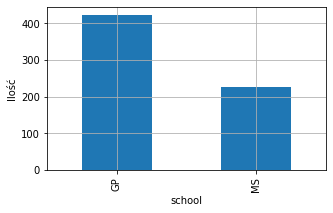

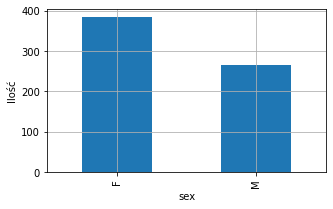

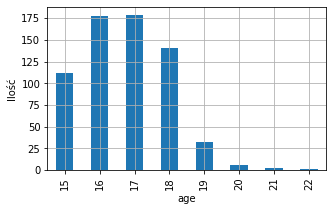

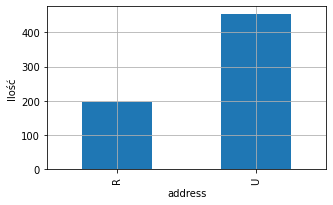

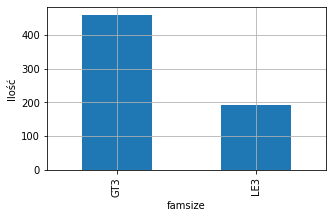

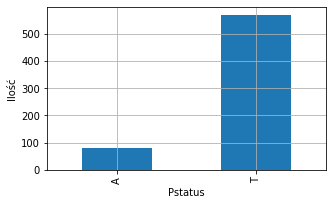

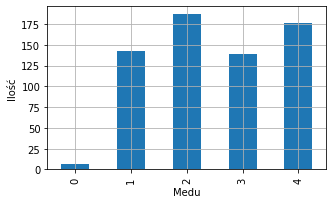

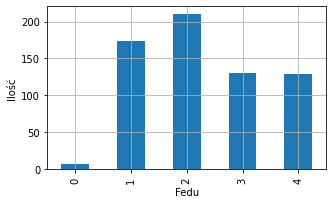

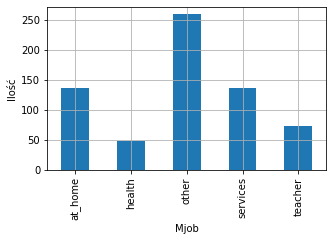

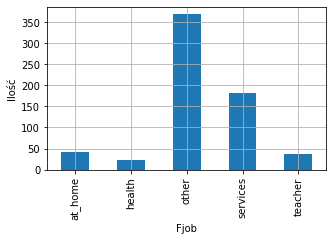

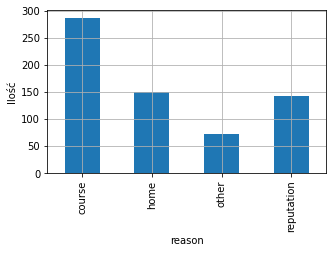

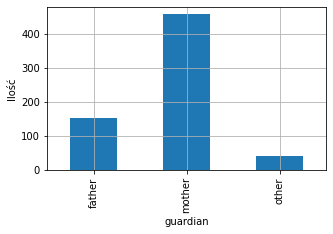

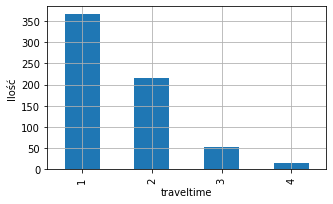

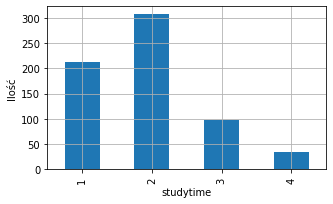

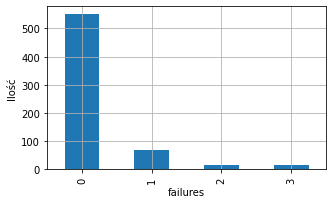

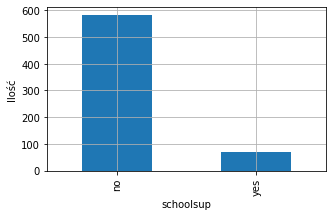

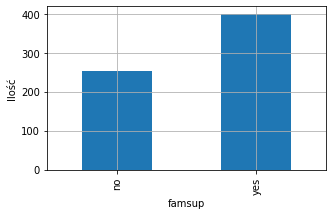

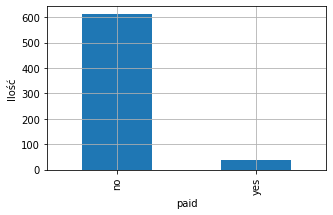

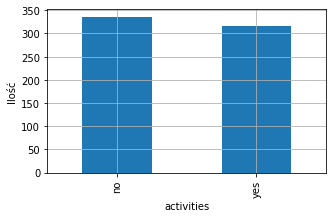

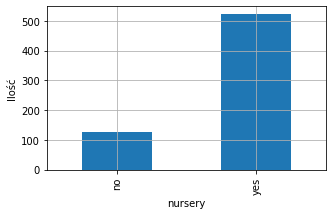

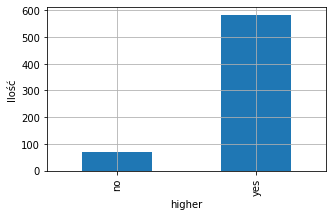

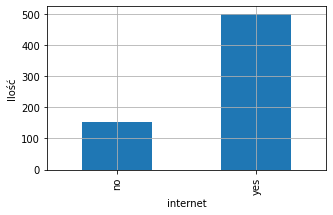

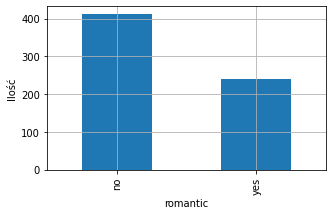

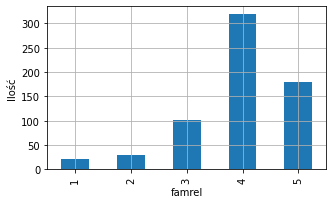

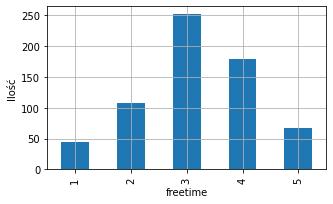

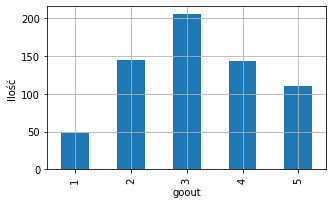

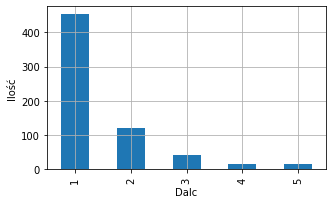

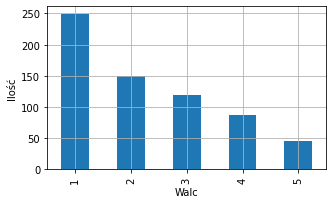

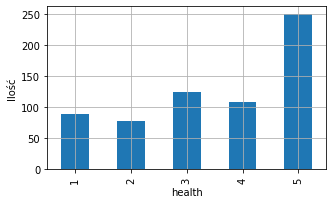

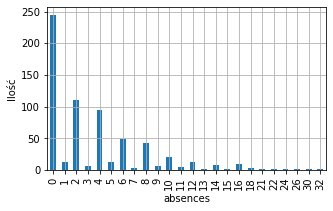

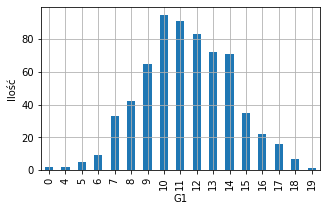

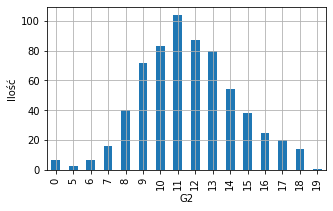

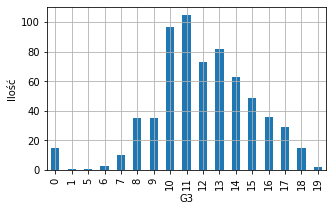

In [4]:
for feature in df_portugese.columns:
    data = copy.copy(df_portugese[feature])
    num_attributes = df_portugese[feature].nunique()
    data.value_counts(sort=False).sort_index().plot(kind='bar', grid=True, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel('Ilość')
    plt.show()

#### Wyrysowanie histogramów zmiennych dla matematyki

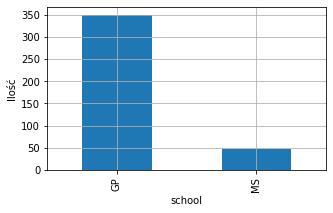

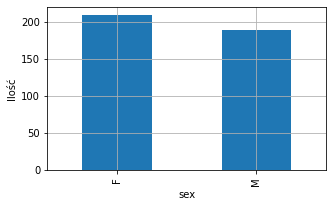

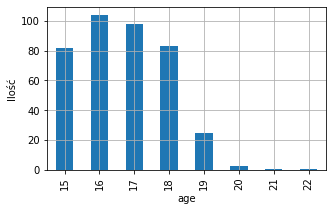

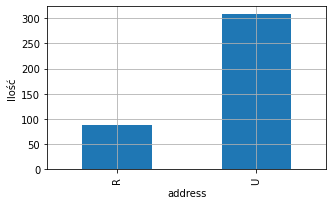

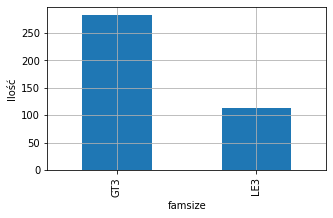

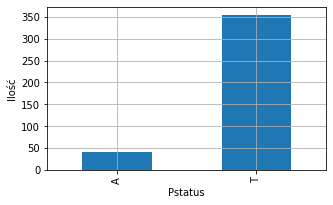

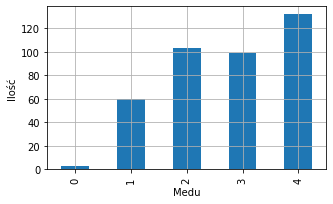

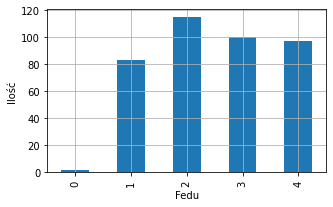

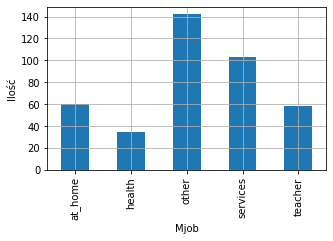

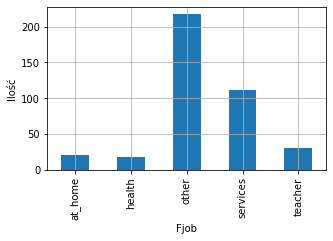

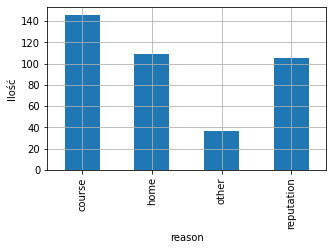

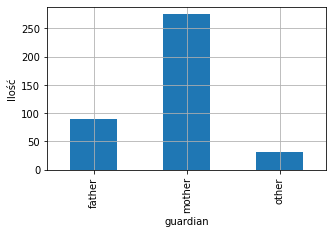

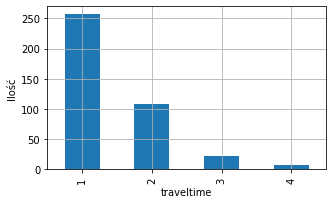

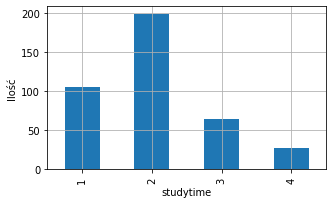

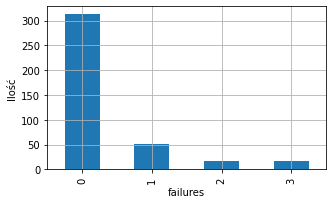

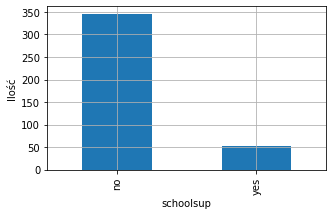

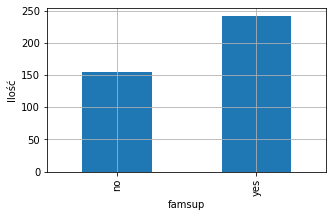

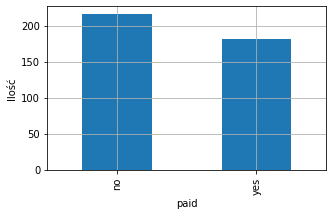

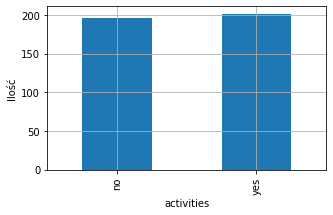

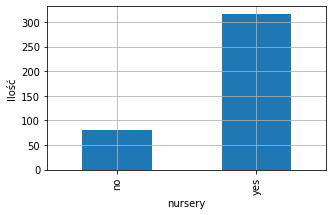

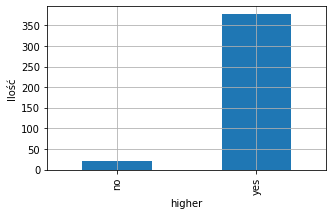

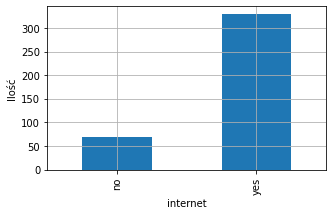

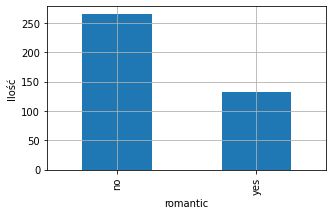

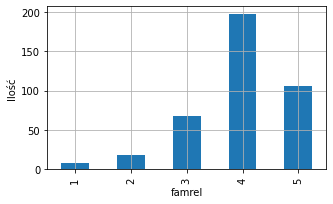

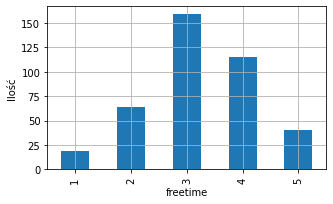

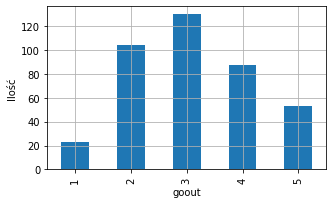

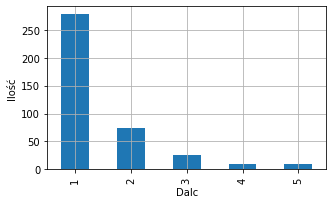

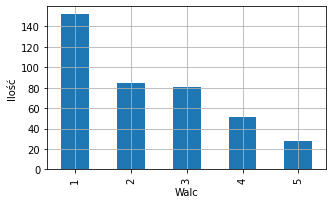

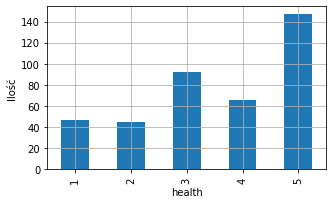

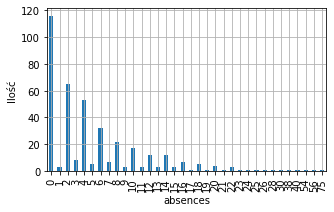

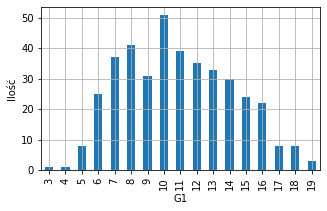

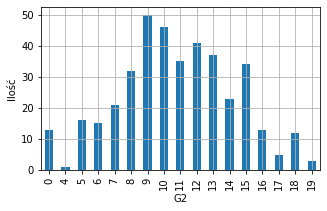

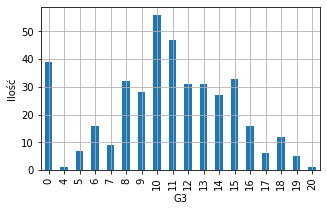

In [5]:
for feature in df_maths.columns:
    data = copy.copy(df_maths[feature])
    num_attributes = df_maths[feature].nunique()
    data.value_counts(sort=False).sort_index().plot(kind='bar', grid=True, figsize=(5, 3))
    plt.xlabel(feature)
    plt.ylabel('Ilość')
    plt.show()

#### Zmiana typu zmiennych na typ liczbowy

In [6]:
data_dictionary = {
    'reason': ['reputation', 'home', 'course', 'other'],
    'guardian': ['mother', 'father', 'other'],
    'Mjob': ['teacher', 'health', 'services', 'at_home', 'other'],
    'Fjob': ['teacher', 'health', 'services', 'at_home', 'other']
}

df_maths['school'] = np.where(df_maths['school'] == 'GP', 0, 1)
df_maths['sex'] = np.where(df_maths['sex'] == 'F', 0, 1)
df_maths['address'] = np.where(df_maths['address'] == 'U', 0, 1)
df_maths['famsize'] = np.where(df_maths['famsize'] == 'LE3', 0, 1)
df_maths['Pstatus'] = np.where(df_maths['Pstatus'] == 'A', 0, 1)

index = 0
for x in data_dictionary['reason']:
    df_maths.loc[df_maths['reason'] == x, 'reason'] = index
    index += 1

index = 0
for x in data_dictionary['guardian']:
    df_maths.loc[df_maths['guardian'] == x, 'guardian'] = index
    index += 1

index = 0
for x in data_dictionary['Mjob']:
    df_maths.loc[df_maths['Mjob'] == x, 'Mjob'] = index
    index += 1

index = 0
for x in data_dictionary['Fjob']:
    df_maths.loc[df_maths['Fjob'] == x, 'Fjob'] = index
    index += 1

for x in data_dictionary:
    df_maths.loc[:, x] = df_maths.loc[:, x].astype('int64')

df_maths['schoolsup'] = np.where(df_maths['schoolsup'] == 'no', 0, 1)
df_maths['famsup'] = np.where(df_maths['famsup'] == 'no', 0, 1)
df_maths['paid'] = np.where(df_maths['paid'] == 'no', 0, 1)
df_maths['activities'] = np.where(df_maths['activities'] == 'no', 0, 1)
df_maths['nursery'] = np.where(df_maths['nursery'] == 'no', 0, 1)
df_maths['higher'] = np.where(df_maths['higher'] == 'no', 0, 1)
df_maths['internet'] = np.where(df_maths['internet'] == 'no', 0, 1)
df_maths['romantic'] = np.where(df_maths['romantic'] == 'no', 0, 1)

In [7]:
df_portugese['school'] = np.where(df_portugese['school'] == 'GP', 0, 1)
df_portugese['sex'] = np.where(df_portugese['sex'] == 'F', 0, 1)
df_portugese['address'] = np.where(df_portugese['address'] == 'U', 0, 1)
df_portugese['famsize'] = np.where(df_portugese['famsize'] == 'LE3', 0, 1)
df_portugese['Pstatus'] = np.where(df_portugese['Pstatus'] == 'A', 0, 1)

index = 0
for x in data_dictionary['reason']:
    df_portugese.loc[df_portugese['reason'] == x, 'reason'] = index
    index += 1

index = 0
for x in data_dictionary['guardian']:
    df_portugese.loc[df_portugese['guardian'] == x, 'guardian'] = index
    index += 1

index = 0
for x in data_dictionary['Mjob']:
    df_portugese.loc[df_portugese['Mjob'] == x, 'Mjob'] = index
    index += 1

index = 0
for x in data_dictionary['Fjob']:
    df_portugese.loc[df_portugese['Fjob'] == x, 'Fjob'] = index
    index += 1

for x in data_dictionary:
    df_portugese.loc[:, x] = df_portugese.loc[:, x].astype('int64')

df_portugese['schoolsup'] = np.where(df_portugese['schoolsup'] == 'no', 0, 1)
df_portugese['famsup'] = np.where(df_portugese['famsup'] == 'no', 0, 1)
df_portugese['paid'] = np.where(df_portugese['paid'] == 'no', 0, 1)
df_portugese['activities'] = np.where(df_portugese['activities'] == 'no', 0, 1)
df_portugese['nursery'] = np.where(df_portugese['nursery'] == 'no', 0, 1)
df_portugese['higher'] = np.where(df_portugese['higher'] == 'no', 0, 1)
df_portugese['internet'] = np.where(df_portugese['internet'] == 'no', 0, 1)
df_portugese['romantic'] = np.where(df_portugese['romantic'] == 'no', 0, 1)

#### Korelacja zmiennych dla ocen z j. portugalskiego

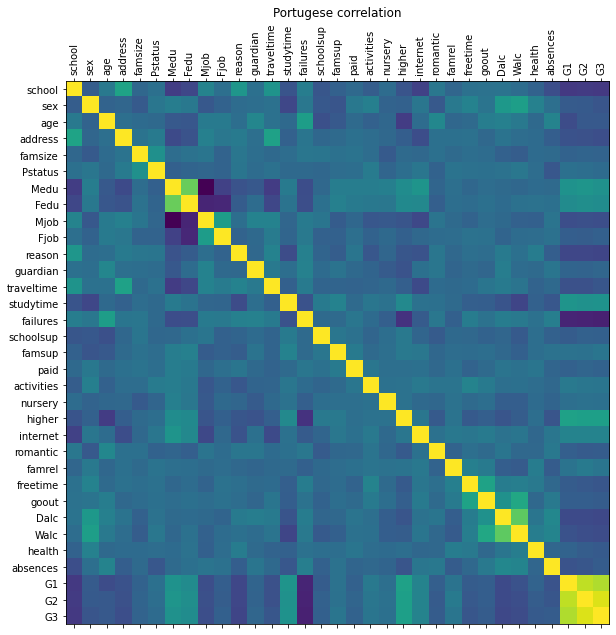

In [8]:
corr_table = df_portugese.corr(method='pearson')
# print(corr_table.loc['failures', :])
labels = [feature for feature in df_portugese.columns]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.matshow(corr_table)
ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Portugese correlation')

plt.show()

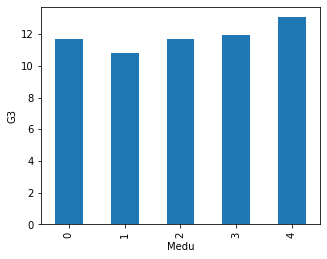

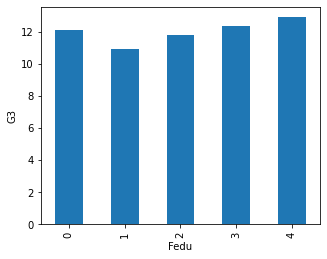

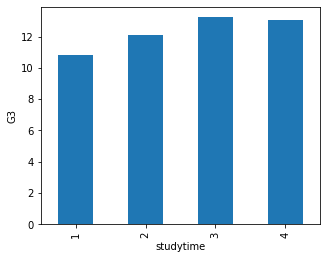

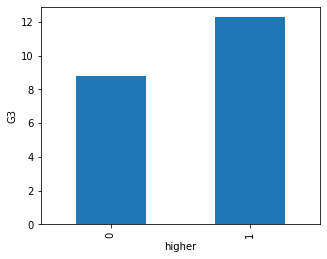

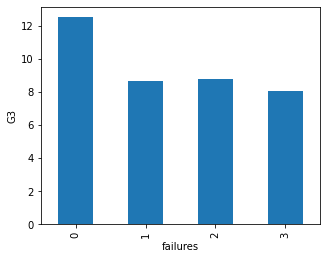

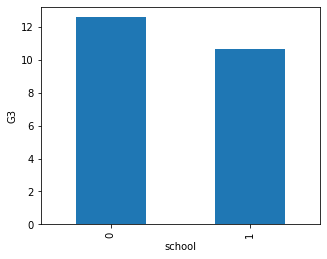

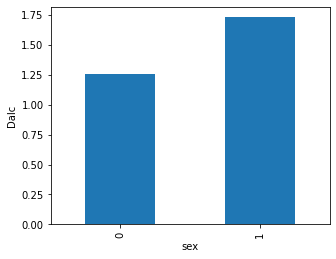

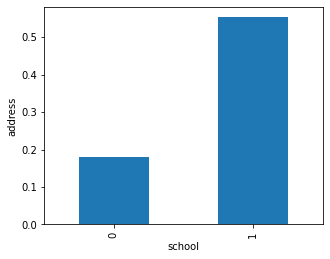

In [9]:
features = ['Medu', 'Fedu', 'studytime', 'higher', 'failures', 'school']

for feature in features:
    df_portugese.groupby(feature)['G3'].mean().plot(kind='bar', figsize=(5,4))
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.show()

df_maths.groupby('sex')['Dalc'].mean().plot(kind='bar', figsize=(5,4))
plt.xlabel('sex')
plt.ylabel('Dalc')
plt.show()

df_maths.groupby('school')['address'].mean().plot(kind='bar', figsize=(5,4))
plt.xlabel('school')
plt.ylabel('address')
plt.show()

Można zauważyć, że w przypadku ocen z j. portugalskiego, są one skorelowane głównie z ocenami z poprzednich lat. Jednak widać też zależność z wykształceniem obu rodziców, chęcią zdobycia wyższego wykształcenia oraz czasu nauki. Występuje też odwrotna korelacja dla liczby niezaliczonych przedmiotów, spożycia alkoholu oraz szkoły (w szkole Gabriela Pereiry częściej występują wyższe oceny z j. portugalskiego). Inne wnioski:
- Z wynika, że mężczyźni w większym stopniu spożywają alkohol,
- Wyższe wykształcenie może wpływać na posiadanie dostępu do internetu (np. pośrednio przez zarobki),
- Starsze osoby częściej niezaliczają przedmiotów, co może być spowodowane tym, że osoby, które powtarzają klasę mają większe szanse, na ponowne niezaliczenie oraz tym, że poziom trudności w kolejnych latach nauki rośnie ,
- Możliwe, że szkoła Mousinho da Silveiry jest położona bliżej terenów wiejskich gdyż czas dojazdu do niej jest większy i uczęszcza tam więcej uczniów ze wsi

#### Korelacja zmiennych dla ocen z matematyki

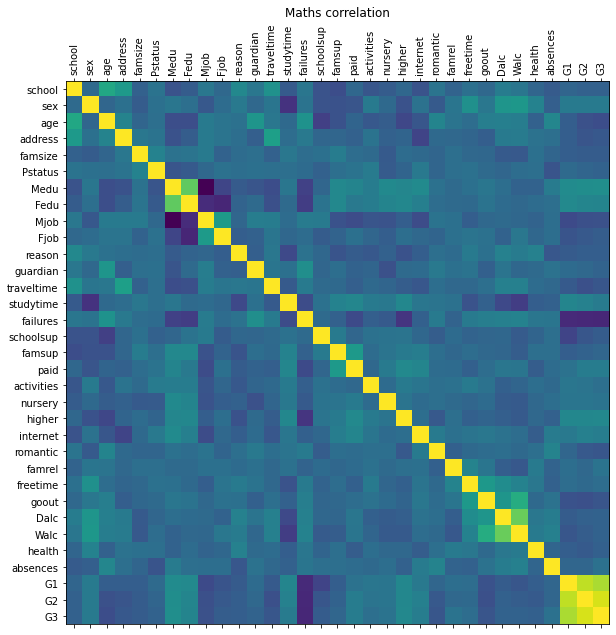

In [10]:
corr_table = df_maths.corr(method='pearson')
# print(corr_table.loc['G3', :])
labels = [feature for feature in df_maths.columns]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.matshow(corr_table)
ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Maths correlation')

plt.show()

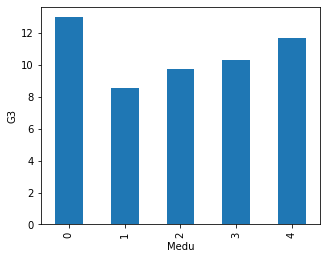

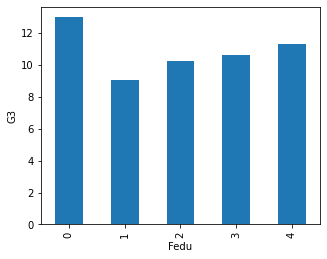

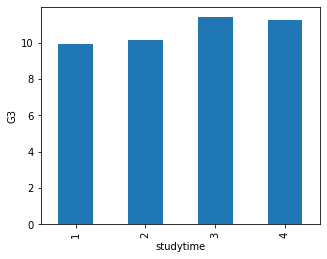

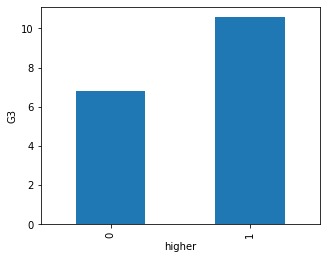

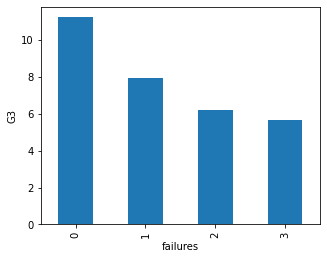

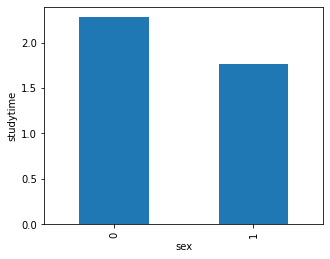

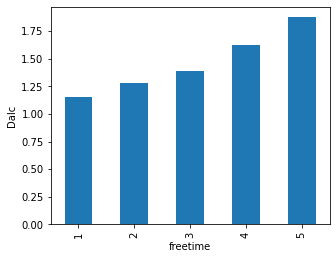

In [11]:
features = ['Medu', 'Fedu', 'studytime', 'higher', 'failures']

for feature in features:
    df_maths.groupby(feature)['G3'].mean().plot(kind='bar', figsize=(5,4))
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.show()

df_maths.groupby('sex')['studytime'].mean().plot(kind='bar', figsize=(5,4))
plt.xlabel('sex')
plt.ylabel('studytime')
plt.show()
df_maths.groupby('freetime')['Dalc'].mean().plot(kind='bar', figsize=(5,4))
plt.xlabel('freetime')
plt.ylabel('Dalc')
plt.show()

Ponownie, największa korelacja występuje z ocenami z poprzednich lat. Widoczna jest również zależność z wykształceniem rodziców, czasem nauki i chęcią studiowania. Podobnie jak wcześniej, liczba niezaliczonych przedmiotów jest względnie mocno skorelowana z oceną końcową. Inne wnioski:  
- kobiety więcej czasu przeznaczają na naukę,
- osoby częściej spożywające alkohol, mniej czasu przeznaczają na naukę,
- osoby posiadające więcej czasu, częściej spożywają alkohol